In [1]:
import pyspark
import pyspark.sql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

from pyspark.sql.functions import col

from pyspark.sql.types import *

In [17]:
movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')

In [5]:
import re
def correct_title(title):
    match = re.match(r'^(.*), The \((\d{4})\)$', title)
    if match:
        movie_name = match.group(1)
        year = match.group(2)
        return f'The {movie_name} ({year})'
    else:
        return title

In [6]:
movies['title'] = movies['title'].apply(correct_title)

In [7]:
movies.shape

(9742, 3)

In [14]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


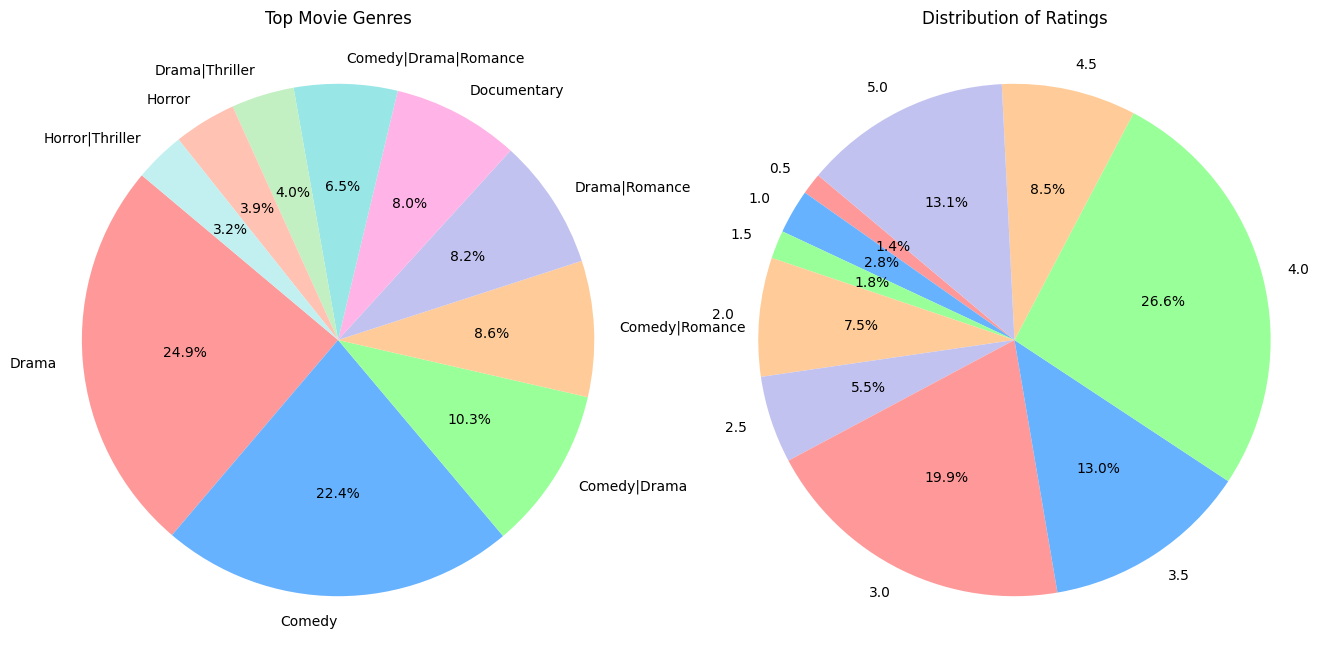

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một lưới 1x2 cho việc hiển thị biểu đồ genres và biểu đồ ratings
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Biểu đồ genres 
a = plt.cm.cool
top_genres = movies['genres'].explode().value_counts().head(10)
colors_genres = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#99e6e6', '#c2f0c2', '#ffc2b3', '#c2f0f0']
axes[0].pie(top_genres.values, labels=top_genres.index, colors=colors_genres, autopct='%1.1f%%', startangle=140, radius=0.55)
axes[0].set_title('Top Movie Genres')
axes[0].axis('equal')

# Biểu đồ ratings
rating_counts = ratings['rating'].value_counts().sort_index()
colors_ratings = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0']
axes[1].pie(rating_counts, labels=rating_counts.index, colors=colors_ratings, autopct='%1.1f%%', startangle=140, radius=0.75)
axes[1].set_title('Distribution of Ratings')
axes[1].axis('equal')

plt.show()

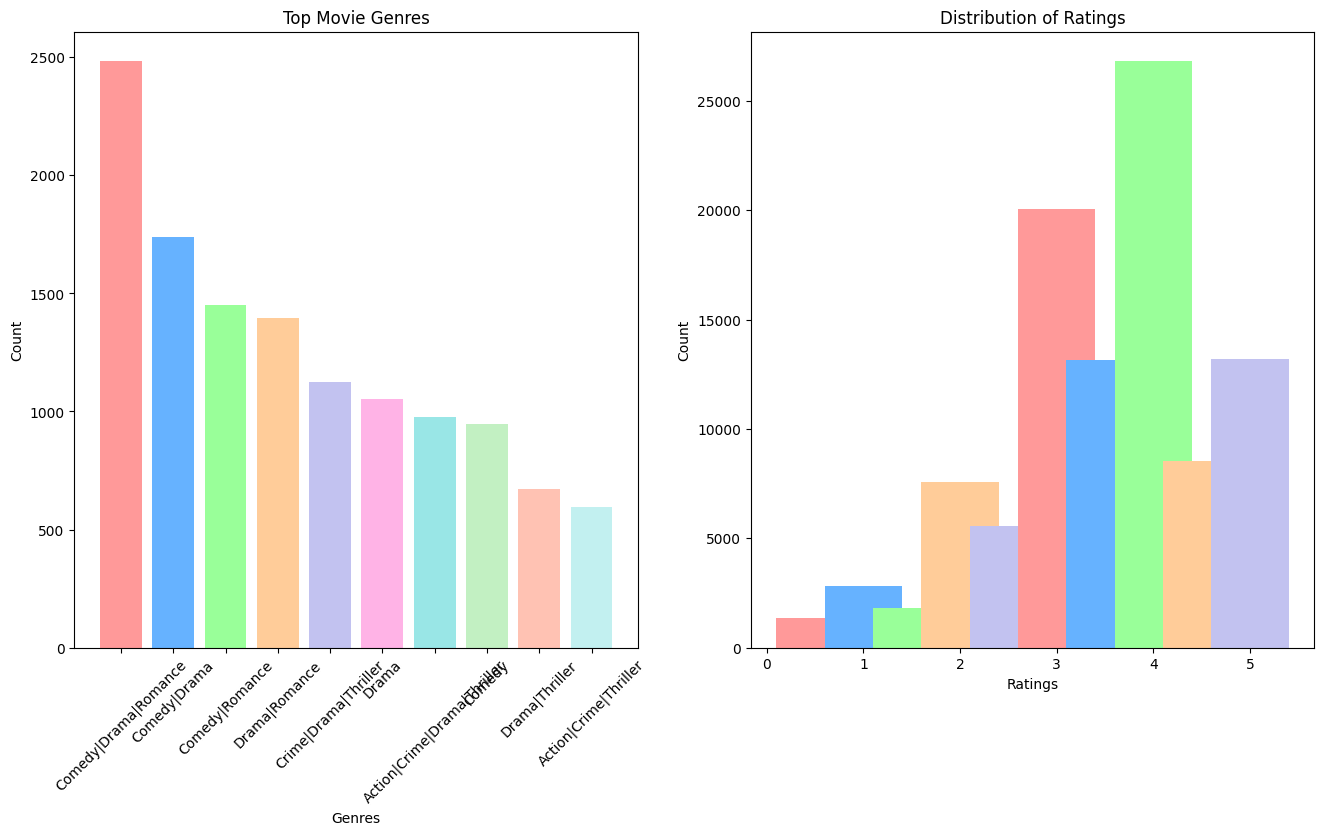

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một lưới 1x2 cho việc hiển thị biểu đồ genres và biểu đồ ratings
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Biểu đồ genres
top_genres = movies['genres'].explode().value_counts().head(10)
colors_genres = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#99e6e6', '#c2f0c2', '#ffc2b3', '#c2f0f0']
axes[0].bar(top_genres.index, top_genres.values, color=colors_genres)
axes[0].set_title('Top Movie Genres')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ ratings 
rating_counts = ratings['rating'].value_counts().sort_index()
colors_ratings = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0']
axes[1].bar(rating_counts.index, rating_counts.values, color=colors_ratings)
axes[1].set_title('Distribution of Ratings')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Count')

plt.show()

